Introduction: The final project for this class is to determine the best neighborhood in Pittsburgh. Since there are several different ways to determine the best neighborhood in Pittsburgh, our group decided to find the neighborhood with the least amount of  crime.Our metric uses police/jail reports, engagning in fighting , and crimes involving arson to detemine the negiborhood with the least crime. Some alternatives we explored were property value, quality of life, police presence and respose time.

The Metric: My sub-metric is fire. I am measuring the neighborhood that has the most crimes relating to arson. I am using the Police Incident Blotter Archive to show this data. 

In [13]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
import pandas as pd
dataset = pd.read_csv("data.csv")
dataset.head(10)

,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,54017,2135988,5232936,5,2005-11-24T23:00:00,"0 Block TECUMSEH ST PITTSBURGH, PA",N,Arlington,4,BURGLARY/FORCE ENT/RES,3301 Arson / 3502 Burglary.,1502.0,5.0,3.0,-79.947860,40.407757
1,274535,3265945,21186829,8,2021-10-11T20:47:00,"1000 Block 5th AV Pittsburgh, PA 15219",N,Bluff,2,ARSON (OTHER COMM-NOT OCCUPIE),3301 Arson / 3304 Criminal Mischief.,103.0,6.0,3.0,-79.990840,40.438573
2,3403,2809123,16019890,99,2016-02-02T12:58:00,"1000 Block 5th AV Pittsburgh, PA 15219",N,Golden Triangle/Civic Arena,2,NaN,3301 Arson / 3304(a)(1) CRIMINAL MISCHIEF-Pro...,201.0,6.0,3.0,-79.990836,40.438565
3,191712,3111645,19203614,8,2019-10-06T14:51:00,"1000 Block Grand AV Pittsburgh, PA 15212",Y,Marshall-Shadeland,1,CAUSING/RISKING CATASTROPHE/INVOL FIRE/EXPL.,2705 Recklessy Endangering Another Person. / 3...,2715.0,1.0,1.0,-80.025332,40.474993
4,342641,3403683,23087637,8,2023-06-09T18:58:00,"1000 Block Laclair ST Pittsburgh, PA 15218",Y,Regent Square,4,ARSON (OTHER),3301(d.1) Dangerous Burning,1410.0,5.0,3.0,-79.897135,40.433162
5,239099,3197959,20228065,8,2020-12-11T03:26:00,"1000 Block Shady AV Pittsburgh, PA 15232",N,Point Breeze,4,ARSON (OTHER),3301 Arson,1404.0,NaN,NaN,NaN,NaN
6,36110,2871450,16208930,99,2016-11-05T16:32:00,"1000 Block Stoneville ST Pittsburgh, PA 15221",N,Homewood North,5,NaN,3301 Arson,1301.0,9.0,2.0,-79.879690,40.456731
7,1505,2802809,16009039,8,2016-01-15T17:30:00,"1000 Block Tropical AV Pittsburgh, PA 15216",Y,Beechview,6,ARSON (MOTOR VEHICLE),3301 Arson,1916.0,4.0,5.0,-80.025747,40.419141
8,155313,3046946,18245877,8,2018-12-15T01:01:00,"1000 Block Wheeler ST Pittsburgh, PA 15221",N,Homewood North,5,ARSON (MOTOR VEHICLE),3301 Arson,1301.0,9.0,2.0,-79.884514,40.457681
9,263321,3245216,21124915,8,2021-07-12T22:00:00,"1000 Block Woodlow ST Pittsburgh, PA 15205",N,Crafton Heights,6,ARSON (MULTI OCC-OCCUPIED),3301 Arson,2814.0,2.0,5.0,-80.052389,40.445803


This line of code drops all the columns without the arson crimes.

In [26]:
dataset[dataset['OFFENSES'].notna()]

,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,54017,2135988,5232936,5,2005-11-24T23:00:00,"0 Block TECUMSEH ST PITTSBURGH, PA",N,Arlington,4,BURGLARY/FORCE ENT/RES,3301 Arson / 3502 Burglary.,1502.0,5.0,3.0,-79.947860,40.407757
1,274535,3265945,21186829,8,2021-10-11T20:47:00,"1000 Block 5th AV Pittsburgh, PA 15219",N,Bluff,2,ARSON (OTHER COMM-NOT OCCUPIE),3301 Arson / 3304 Criminal Mischief.,103.0,6.0,3.0,-79.990840,40.438573
2,3403,2809123,16019890,99,2016-02-02T12:58:00,"1000 Block 5th AV Pittsburgh, PA 15219",N,Golden Triangle/Civic Arena,2,NaN,3301 Arson / 3304(a)(1) CRIMINAL MISCHIEF-Pro...,201.0,6.0,3.0,-79.990836,40.438565
3,191712,3111645,19203614,8,2019-10-06T14:51:00,"1000 Block Grand AV Pittsburgh, PA 15212",Y,Marshall-Shadeland,1,CAUSING/RISKING CATASTROPHE/INVOL FIRE/EXPL.,2705 Recklessy Endangering Another Person. / 3...,2715.0,1.0,1.0,-80.025332,40.474993
4,342641,3403683,23087637,8,2023-06-09T18:58:00,"1000 Block Laclair ST Pittsburgh, PA 15218",Y,Regent Square,4,ARSON (OTHER),3301(d.1) Dangerous Burning,1410.0,5.0,3.0,-79.897135,40.433162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,143343,3022691,18166605,8,2018-08-27T22:23:00,"Winston ST & Trowbridge ST Pittsburgh, PA 15207",N,Hazelwood,4,ARSON (OTHER),3301 Arson / 3304(a)(1) CRIMINAL MISCHIEF-Pro...,1515.0,5.0,3.0,-79.938349,40.405395
550,149761,3034967,18213261,99,2018-10-27T16:43:00,"W North AV & Arch ST Pittsburgh, PA 15212",N,Allegheny Center,1,NaN,3301 Arson,2204.0,1.0,1.0,-80.008631,40.455099
551,43711,2110356,5131581,99,2005-07-13T18:45:00,"YAZOO WY & MELVILLE WY PITTSBURGH, PA",N,Lower Lawrenceville,2,NaN,3301 Arson,603.0,7.0,2.0,-79.965568,40.467352
552,99904,2113351,5131581,99,2005-07-13T18:45:00,"YAZOO WY & MELVILLE WY PITTSBURGH, PA",N,Lower Lawrenceville,2,NaN,3301 Arson,603.0,7.0,2.0,-79.965568,40.467352


This line of code filters through the dataset to show only the arson related crimes

In [27]:
arson_data = dataset[dataset['OFFENSES'].str.contains('ARSON', case=False, na=False)]
print(arson_data)

        _id       PK       CCR  HIERARCHY         INCIDENTTIME  \
0     54017  2135988   5232936          5  2005-11-24T23:00:00   
1    274535  3265945  21186829          8  2021-10-11T20:47:00   
2      3403  2809123  16019890         99  2016-02-02T12:58:00   
3    191712  3111645  19203614          8  2019-10-06T14:51:00   
5    239099  3197959  20228065          8  2020-12-11T03:26:00   
..      ...      ...       ...        ...                  ...   
548  345493  3409725  23102841          8  2023-07-05T14:44:00   
549  143343  3022691  18166605          8  2018-08-27T22:23:00   
550  149761  3034967  18213261         99  2018-10-27T16:43:00   
551   43711  2110356   5131581         99  2005-07-13T18:45:00   
552   99904  2113351   5131581         99  2005-07-13T18:45:00   

                                    INCIDENTLOCATION CLEAREDFLAG  \
0                0 Block TECUMSEH ST PITTSBURGH, PA            N   
1             1000 Block 5th AV Pittsburgh, PA 15219           N   
2  

This code removes the rows that have missing values.

In [37]:
arson_data_filtered = arson_data[dataset['INCIDENTNEIGHBORHOOD'].notna()]
print(arson_data_filtered)

        _id       PK       CCR  HIERARCHY         INCIDENTTIME  \
0     54017  2135988   5232936          5  2005-11-24T23:00:00   
1    274535  3265945  21186829          8  2021-10-11T20:47:00   
2      3403  2809123  16019890         99  2016-02-02T12:58:00   
3    191712  3111645  19203614          8  2019-10-06T14:51:00   
5    239099  3197959  20228065          8  2020-12-11T03:26:00   
..      ...      ...       ...        ...                  ...   
548  345493  3409725  23102841          8  2023-07-05T14:44:00   
549  143343  3022691  18166605          8  2018-08-27T22:23:00   
550  149761  3034967  18213261         99  2018-10-27T16:43:00   
551   43711  2110356   5131581         99  2005-07-13T18:45:00   
552   99904  2113351   5131581         99  2005-07-13T18:45:00   

                                    INCIDENTLOCATION CLEAREDFLAG  \
0                0 Block TECUMSEH ST PITTSBURGH, PA            N   
1             1000 Block 5th AV Pittsburgh, PA 15219           N   
2  

<ipython-input-37-32436cc5b7ac>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  arson_data_filtered = arson_data[dataset['INCIDENTNEIGHBORHOOD'].notna()]


This code prints the number of arson crimes in each neighborhood.

In [39]:
neighborhood_total = arson_data['INCIDENTNEIGHBORHOOD'].value_counts()
print(neighborhood_total)

Homewood South               19
Homewood North               17
Central Business District    14
Knoxville                    14
East Hills                   13
                             ..
Windgap                       1
California-Kirkbride          1
Esplen                        1
South Oakland                 1
Arlington                     1
Name: INCIDENTNEIGHBORHOOD, Length: 76, dtype: int64


The code groups the data by the "INCIDENT NEIGHBORHOOD" on the x-axis and the y-axis counts how many time arson crimes have orrcued in that neighborhood. 

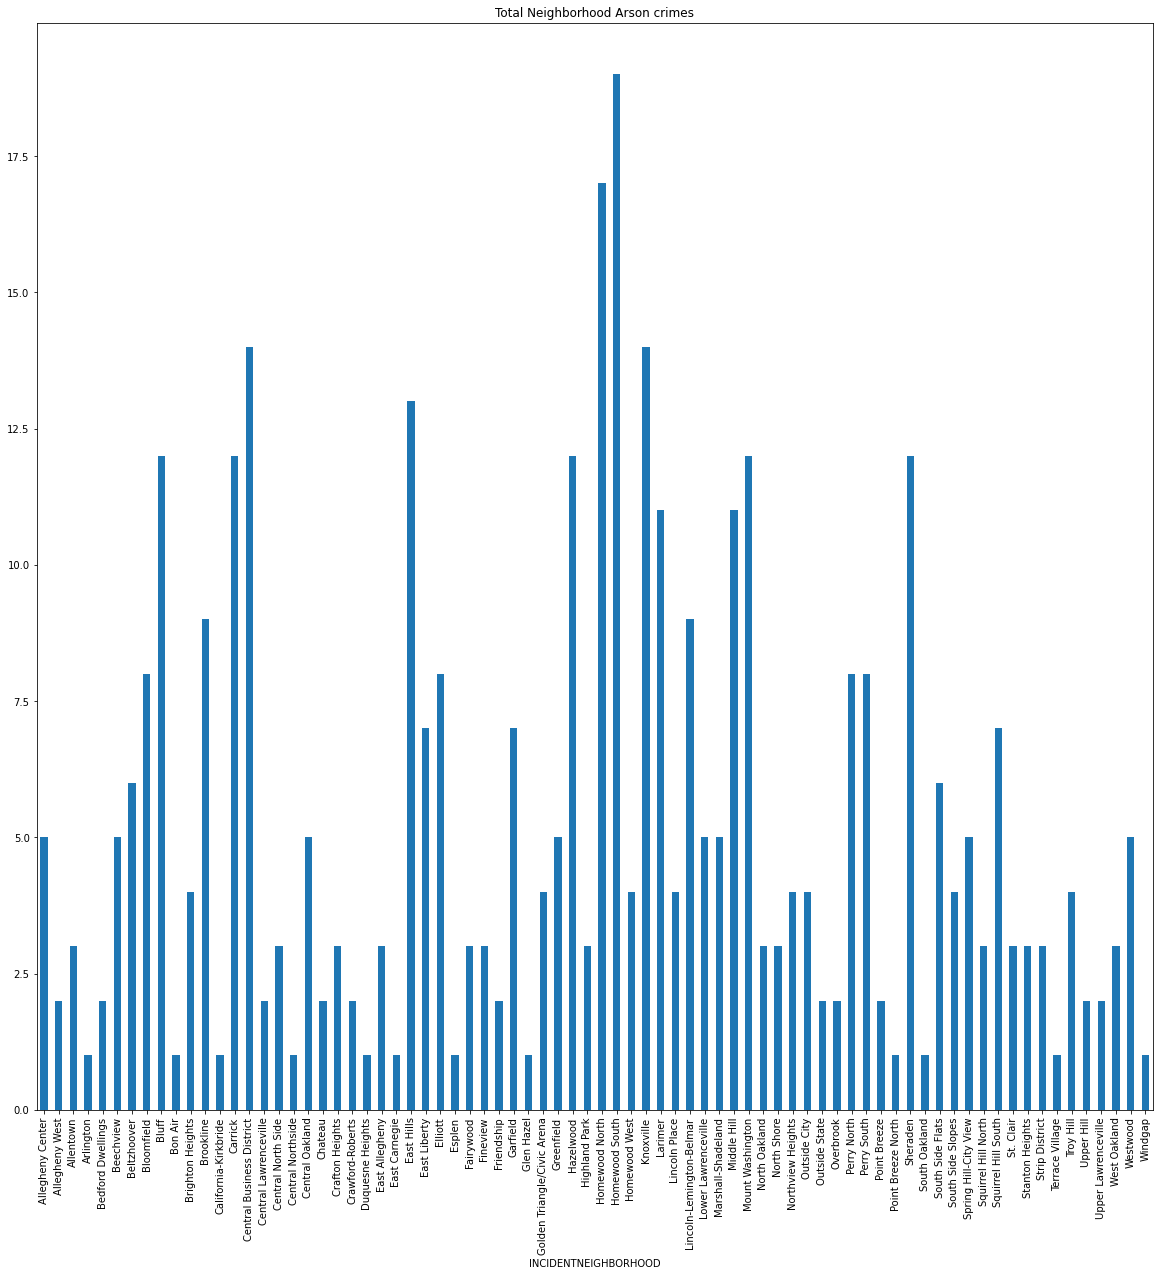

In [43]:
bar_graph_data = arson_data.groupby("INCIDENTNEIGHBORHOOD").count()
bar_graph_data["OFFENSES"].plot.bar(figsize = (20,20), title=" Neighborhood Arson crimes")

Then, the code arranges the organized the arsom crimes in from least to most or smallest amount or crimes to most amount of crimes.

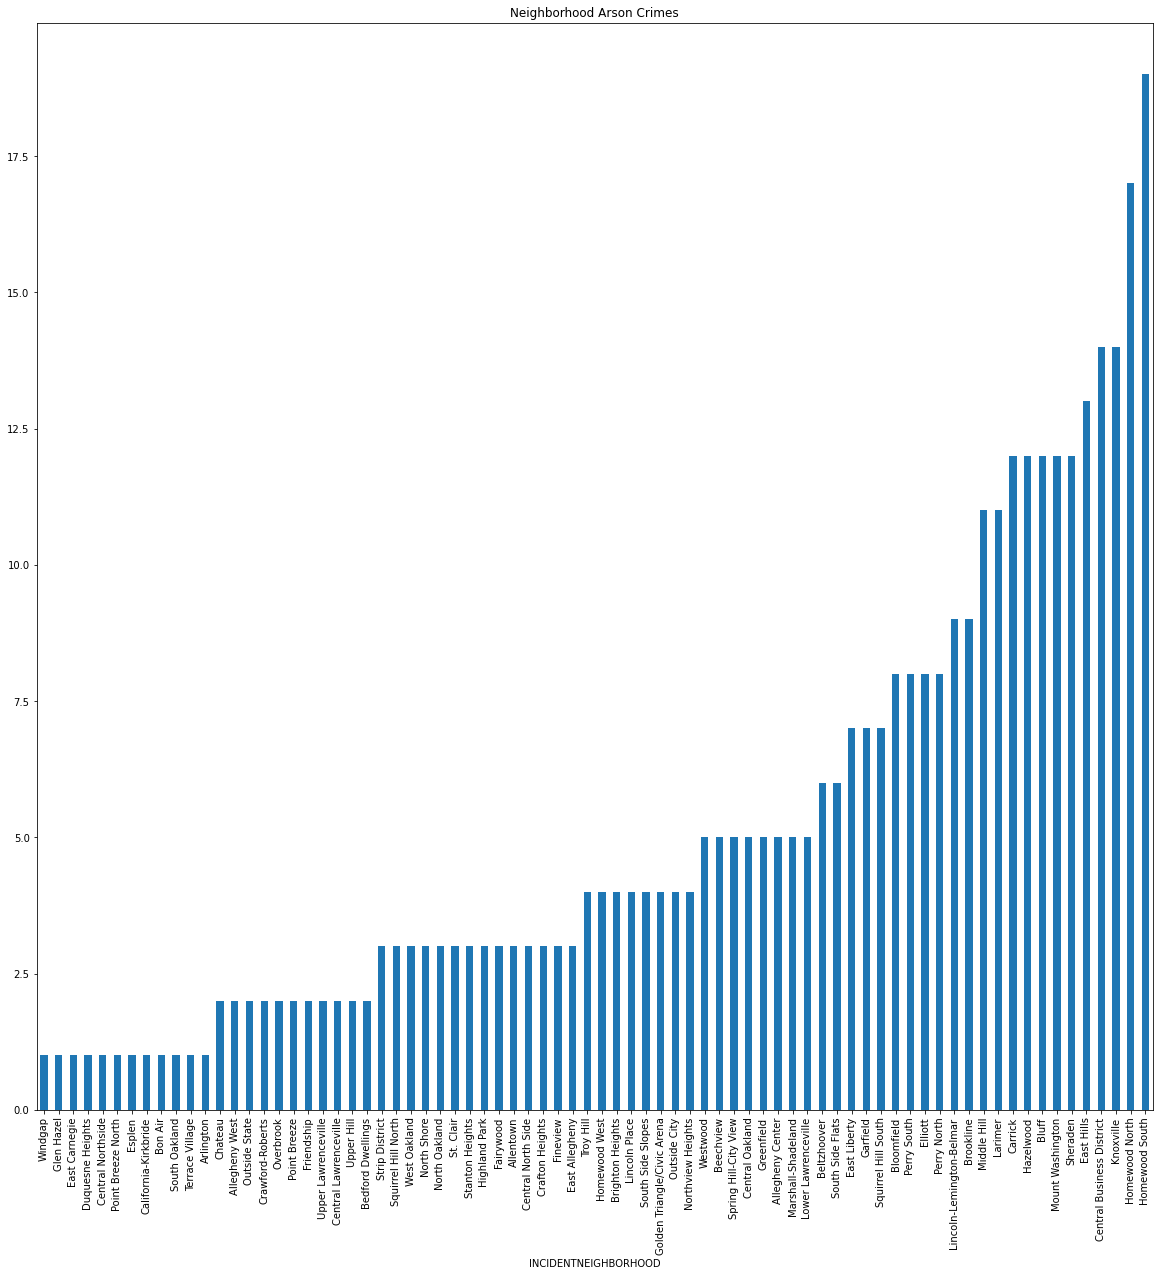

In [59]:
sorted_neighborhoods = bar_graph_data.sort_values("OFFENSES")
sorted_neighborhoods["OFFENSES"].plot.bar(figsize=(20, 20), title="Neighborhood Arson Crimes")

So, for our project we anaylzed the negihborhoods with the least crime. The best neighborhood would obviously have low crime rates and reports. After analyzing the Arson Metric, I have identifed the negihborhoods with the least amount of arson crimes using data from 2015-2023. The neighborhoods are WindGap, Arlington, and South Oakland with 1 arson crime. My favorite neighborhood is the Strip District. It has lots of shopping stores, activites, and resturants. It is close to Downtown Pittsburgh, the Strip District is easy to get 